In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:


df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-raptor/historical_RAPTOR_by_player.csv')

df.head()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922


Project 2 - Part 2 (Core)
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [ ]:
# Check for duplicates
df.duplicated().any()

False

In [ ]:
# Check for missings
df.isnull().sum()

player_name         0
player_id           0
season              0
poss                0
mp                  0
raptor_offense      0
raptor_defense      0
raptor_total        0
war_total           0
war_reg_season      0
war_playoffs        0
predator_offense    0
predator_defense    0
predator_total      0
pace_impact         1
dtype: int64

In [ ]:
# There are missing values in the Region column - let's investigate those
df[df['pace_impact'].isnull()]

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
12254,Malik Newman,newmama01,2020,8,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df = df.drop(index = 12254)

In [ ]:
df.drop(df[df.mp < 250].index, inplace=True)
df.drop(df[df.season < 2000].index, inplace=True)

This was probably the most important decision I made. I got rid of any small sample sizes so any player who played less than 250 minutes in a particular season. The reason for this is that traditionally NBA players need at least 15-20 worth of games to have sample sizes that are big enough that hte stats can begin to stabilize. Otherwise it is just too noisy and a byproduct of variance more than anything that should be meaningfully charted or measured. 

The other decision I made was to exclude any seasons prior to 2000. A few reasons I did this. First of all it just makes it easier there are as is already about 10000 rows of data even making this filter. Secondly alot of the data they use in designing these 538 basketball algorithms is not nearly as reliable pre 2000. Tracking cameras didnt really exist back then to nearly the same degree they do now. Stat keepers werent as reliable and consistent. There was no source of verifying alot of the data and hence it can lead to some questionable figures. All these basic stats you see like points, rebounds, assists, shooting percentage etc are incorporated in these 538 models Im using so the accuracy of those historical records absolutely matters in determining the accuracy and validity of these models. It's best hence in my opinion to just leave them out we have more than enough data to work with without them still.

In [ ]:
df.head()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
26,Mahmoud Abdul-Rauf,abdulma02,2001,939,486,0.678521,-2.640498,-1.961977,0.195461,0.195461,0.000000,-0.031734,-3.090444,-3.122178,0.030938
29,Tariq Abdul-Wahad,abdulta01,2000,3215,1578,-1.188052,-0.457694,-1.645746,0.876071,0.876071,0.000000,-1.310627,-0.196093,-1.506720,0.018992
30,Tariq Abdul-Wahad,abdulta01,2001,820,420,-5.303661,-0.963653,-6.267315,-0.758930,-0.758930,0.000000,-5.359760,-1.405260,-6.765020,0.640190
31,Tariq Abdul-Wahad,abdulta01,2002,841,441,-2.524324,-0.478045,-3.002369,-0.056546,-0.056546,0.000000,-2.679625,-0.135060,-2.814685,0.412453
32,Tariq Abdul-Wahad,abdulta01,2003,553,283,-0.212466,-0.957466,-1.169932,0.228929,0.199733,0.029195,-0.861448,-1.391198,-2.252645,-0.325525


In [ ]:
len(df)

8471

In [ ]:
df.dtypes

player_name          object
player_id            object
season                int64
poss                  int64
mp                    int64
raptor_offense      float64
raptor_defense      float64
raptor_total        float64
war_total           float64
war_reg_season      float64
war_playoffs        float64
predator_offense    float64
predator_defense    float64
predator_total      float64
pace_impact         float64
dtype: object

In [ ]:
df.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,8471.000000,8471.00000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000
mean,2010.817731,3120.62047,1581.916775,-0.669496,-0.153124,-0.822620,2.355008,2.123354,0.231654,-0.704934,-0.265931,-0.970865,0.075074
std,6.346959,1712.79242,876.587220,2.342726,1.710414,2.985527,3.611841,3.188968,0.667016,2.339156,1.741230,3.152573,0.586952
min,2000.000000,470.00000,250.000000,-8.999990,-7.891169,-14.568172,-7.382978,-7.382978,-1.376520,-8.712563,-7.190238,-13.598980,-2.328584
25%,2005.000000,1633.50000,822.500000,-2.235302,-1.281702,-2.777651,-0.014312,-0.022834,0.000000,-2.278156,-1.416145,-3.147044,-0.295673
50%,2011.000000,3004.00000,1512.000000,-0.766207,-0.239710,-0.905757,1.178089,1.120049,0.000000,-0.834675,-0.355112,-1.125157,0.034874
75%,2016.000000,4407.50000,2226.000000,0.719313,0.898714,1.054410,3.718670,3.503495,0.142702,0.667256,0.835225,1.069681,0.407085
max,2021.000000,8238.00000,4202.000000,10.379411,7.907439,12.580815,28.525259,23.659318,7.006934,10.893131,7.459246,13.347925,3.996917


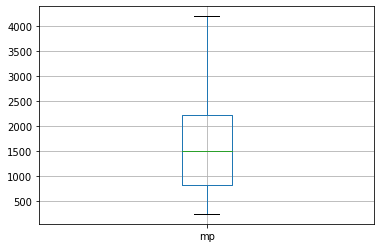

In [ ]:
df.boxplot(column = 'mp');

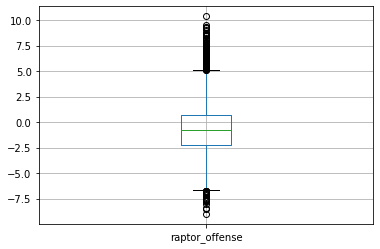

In [ ]:
df.boxplot(column = 'raptor_offense');

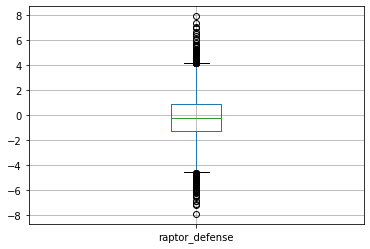

In [ ]:
df.boxplot(column = 'raptor_defense');

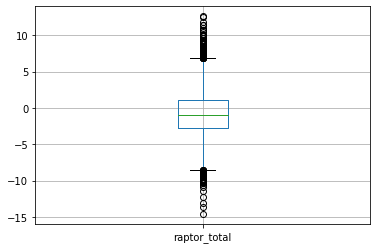

In [ ]:
df.boxplot(column = 'raptor_total');

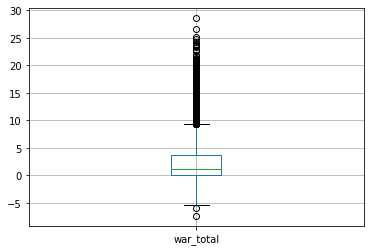

In [ ]:
df.boxplot(column = 'war_total');

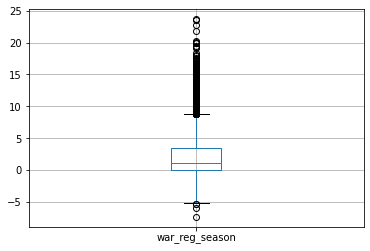

In [ ]:
df.boxplot(column = 'war_reg_season');

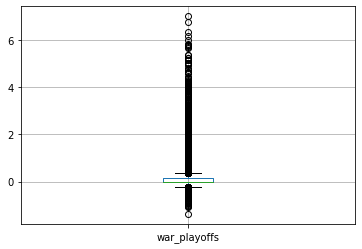

In [ ]:
df.boxplot(column = 'war_playoffs');

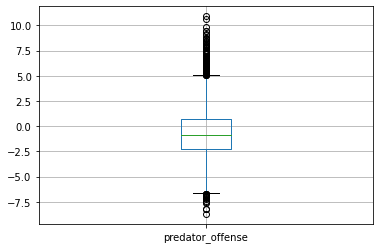

In [ ]:
df.boxplot(column = 'predator_offense');

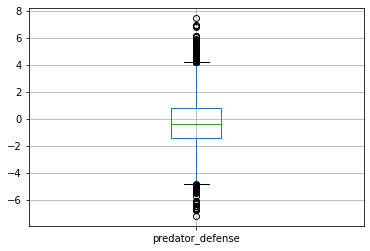

In [ ]:
df.boxplot(column = 'predator_defense');

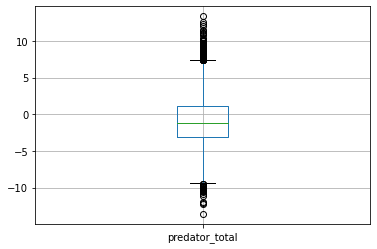

In [ ]:
df.boxplot(column = 'predator_total');

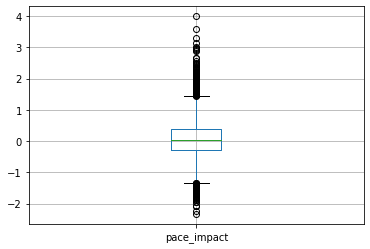

In [ ]:
df.boxplot(column = 'pace_impact');

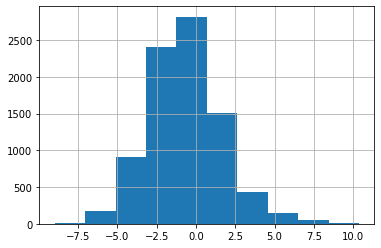

In [ ]:
df['raptor_offense'].hist();

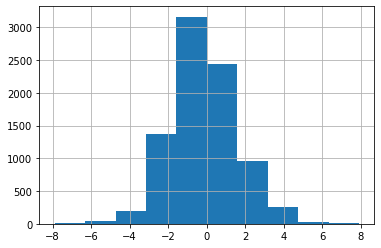

In [ ]:
df['raptor_defense'].hist();

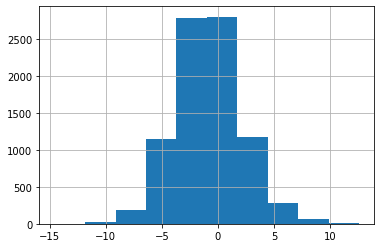

In [ ]:
df['raptor_total'].hist();

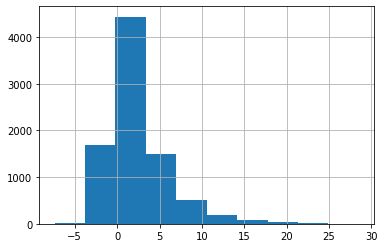

In [ ]:
df['war_total'].hist();

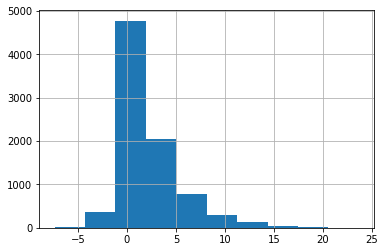

In [ ]:
df['war_reg_season'].hist();

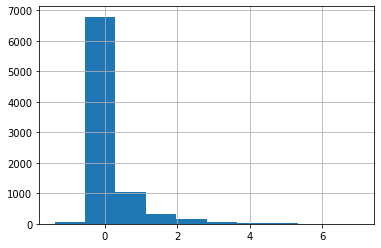

In [ ]:
df['war_playoffs'].hist();

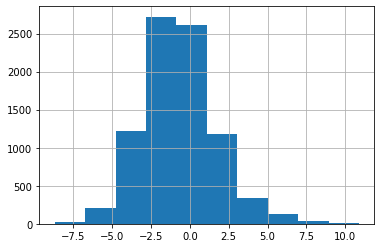

In [ ]:
df['predator_offense'].hist();

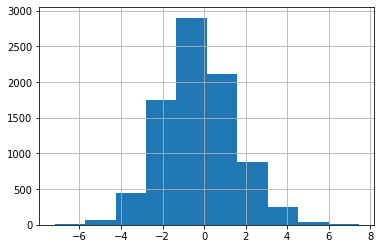

In [ ]:
df['predator_defense'].hist();

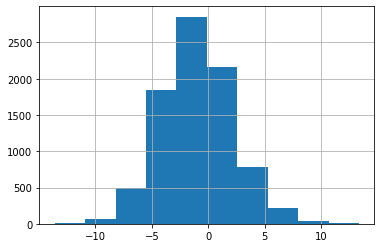

In [ ]:
df['predator_total'].hist();

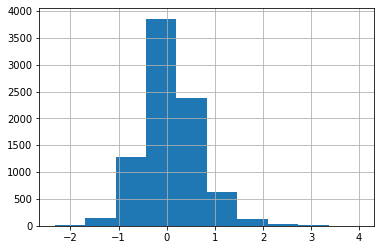

In [ ]:
df['pace_impact'].hist();